<a href="https://colab.research.google.com/github/yash-choudhary/Keras-Tutorial-MNIST/blob/master/Keras_Tutorial_MNIST_sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import pandas as pd

Using TensorFlow backend.


In [0]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


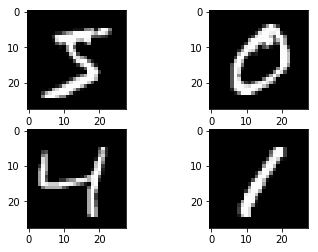

In [0]:
plt.subplot(221)
plt.imshow(xtrain[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(xtrain[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(xtrain[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(xtrain[3], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
seed=7
numpy.random.seed(seed)

In [0]:
num_pixels = xtrain.shape[1]*xtrain.shape[2]
xtrain = xtrain.reshape(xtrain.shape[0], num_pixels).astype('float32')
xtest = xtest.reshape(xtest.shape[0], num_pixels).astype('float32')

In [0]:
#normalize 
xtrain = xtrain/255
xtest = xtest/255

In [0]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [0]:
num_classes = ytrain.shape[1]

In [0]:
num_pixels

784

In [0]:
#baseline sequential model with one input and one output layer.
def baseline_model():
  model = Sequential()
  model.add(Dense(num_pixels,input_dim = num_pixels,kernel_initializer='normal',activation='relu'))
  model.add(Dense(num_classes,kernel_initializer='normal',activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
model = baseline_model()
model.fit(xtrain,ytrain,validation_data = (xtest,ytest),epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(xtest,ytest,verbose=2)
print("BaseLine Model: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1412 - val_acc: 0.9575
Epoch 2/10
 - 1s - loss: 0.1116 - acc: 0.9676 - val_loss: 0.0925 - val_acc: 0.9701
Epoch 3/10
 - 1s - loss: 0.0718 - acc: 0.9799 - val_loss: 0.0784 - val_acc: 0.9771
Epoch 4/10
 - 1s - loss: 0.0506 - acc: 0.9857 - val_loss: 0.0742 - val_acc: 0.9771
Epoch 5/10
 - 1s - loss: 0.0375 - acc: 0.9892 - val_loss: 0.0679 - val_acc: 0.9789
Epoch 6/10
 - 1s - loss: 0.0270 - acc: 0.9928 - val_loss: 0.0636 - val_acc: 0.9806
Epoch 7/10
 - 1s - loss: 0.0210 - acc: 0.9947 - val_loss: 0.0627 - val_acc: 0.9814
Epoch 8/10
 - 1s - loss: 0.0141 - acc: 0.9969 - val_loss: 0.0633 - val_acc: 0.9795
Epoch 9/10
 - 1s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0592 - val_acc: 0.9814
Epoch 10/10
 - 1s - loss: 0.0080 - acc: 0.9985 - val_loss: 0.0582 - val_acc: 0.9809